In [1]:
import spotipy 
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import os
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
def csv_generator(playlist_id):

    client_id = '7d762f3b161b4d838d72ac54d2f71340' # client id
    client_secret = '5b6baeaa550e43c0ab8b1e8d25e8a3e8' # client secret

    client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    song_meta =  song_meta={'id':[], 'name':[], 'release_year':[], 
            'instrumentalness':[],'time_signature':[],'tempo':[],'loudness':[],'energy':[], 'danceability':[], 'valence':[], 'mode':[]}
            
    playlist = sp.playlist(playlist_id)
    tracks_total = playlist['tracks']['total']

    rest= tracks_total % 100 
    iterationen = tracks_total//100
    if rest > 0:
        iterationen+=1
            
    for j in range (0,iterationen):
            
        # Vor jedem Durchlauf Variablen zurücksetzen
        song_ids=[]
            
            # Abfrage über die Spotify API (via Spotipy)
        offset_var=j*100 
        
        playlist_info = sp.playlist(playlist_id)
        playlist_name = playlist_info['name']

        results = sp.playlist_items(playlist_id, offset=offset_var)
        
            # Für jeden Song der Playlist (dieses Durchlaufs) die unter "song_meta" definierten Parameter/Informationen (Metadaten) extrahieren
        for x in results['items']:
            track = x['track']['id']
                
                # Songs, die zwar in der Playlist aufgeführt werden, aber nicht mehr abspielbar sind (Rechte, geografische Beschränkungen etc.) 
                # werden aus der Liste der zu analysierenden Songs entfernt
            if track:
                song_ids.append(track)
                    
        for song_id in song_ids:
                
            meta=sp.track(song_id)
            features=sp.audio_features(song_id)
            
            song_meta['id'].append(song_id)
            
            song_meta['name'].append(meta['name'])
            
            date = meta['album']['release_date']
            song_meta['release_year'].append(date[0:4])
            
            song_meta['instrumentalness'].append(features[0]['instrumentalness'])
            
            song_meta['time_signature'].append(features[0]['time_signature'])
            
            song_meta['tempo'].append(features[0]['tempo'])
            
            song_meta['loudness'].append(features[0]['loudness'])
            
            song_meta['energy'].append(features[0]['energy'])
                    
            song_meta['danceability'].append(features[0]['danceability'])
            
            song_meta['valence'].append(features[0]['valence'])
            
            mode = features[0]['mode']
            song_meta['mode'].append('Major' if mode == 1 else 'Minor')
                
        j+=1
        
    song_meta_df=pd.DataFrame(song_meta)
    
    return song_meta_df, playlist_name

In [6]:
House = '37i9dQZF1EIeXVd9c2ss7N'

Acid_House = "37i9dQZF1DXbwcS5W73XRr" 
Tech_House = "37i9dQZF1EIdYGLEcJ1MOg" 
Deep_House = "37i9dQZF1EId9cZrsKjzaP" 
French_House = "37i9dQZF1EIcuiL1mpCAIt"
Tribal_House = "37i9dQZF1EIfQajB6XcU1O" 
Dub_House = "37i9dQZF1EIgYC5qlaBSCs"
Minimal_House = "37i9dQZF1EIdYO7IChD0MX" 

Techno='37i9dQZF1EIeKh45OZ1ylm'

Dub_Techno="37i9dQZF1EIhEDoRLX0DrX" 
Minimal_Techno="37i9dQZF1EIeF5mYoojHrz" 
Acid_Techno="37i9dQZF1EIfsVc99Phh0A" 
Hardstyle_Techno="37i9dQZF1EIf4juIdMs3fA"   
Tribal_Techno="37i9dQZF1EIdKNQuNzAsGK" 
French_Techno="37i9dQZF1EIhP1b0R1k2bH" 
Melodic_Techno="37i9dQZF1EIdec6qRjNYma"

Breakbeat='37i9dQZF1EIctO9E5tx0pp'

Breakcore="37i9dQZF1EIcwtrihYBzLc"
Drum_n_Bass="37i9dQZF1EIherXksVvnrN" 
Liquid_Drum_n_Bass="1ZPoSkFGARRV0ZZEVG3hIw" 
Jungle="37i9dQZF1EIfSTBvJ0oK9r"  
Jump_Up="37i9dQZF1DX4to60X6goeK" 
Funky_Breaks="37i9dQZF1EIeUC5PSLUKZ5" 
Nu_Skool_Breaks="37i9dQZF1EIfa4SOXWW4uW" 

Trance='37i9dQZF1DXbtYAdenGE9U'

Acid_Trance="37i9dQZF1EIg6Tz5eO41Eb" 
Goa="37i9dQZF1EIejWfFUKOmPZ" 
Psytrance="37i9dQZF1EIgsqtnjgdsOe" 
Tech_Trance="37i9dQZF1EIhD0vkYxpTwX" 
Dub_Trance="37i9dQZF1EIcqosfYVq5Fs" 

Hardcore='37i9dQZF1EIexrP9IBJXx5'

Speedcore="37i9dQZF1EIfVREkRuvHOQ" 
Darkcore="37i9dQZF1EIcI0ylpAxYA9" 
Frenchcore="37i9dQZF1EIh2LoMooAkWI" 
Trancecore="37i9dQZF1EIgGW6cWdNRXo" 
Gabber="37i9dQZF1EIfM1AoS6u10M" 
Extratone="37i9dQZF1EIfgFB1HlKhbP" 

Garage='37i9dQZF1EIgK79rhfYjQ4'

UK_Garage="37i9dQZF1EIfvIYxbwTls1" 
Speed_Garage="37i9dQZF1EIgLKjxQpaJeo" 
Grime="37i9dQZF1EIfjNadf8dnTb" 
Dubstep="37i9dQZF1EIeh9ieKsgN2r" 
_2_step="37i9dQZF1EIhHjuYNuuSDa" 
Melodic_Dubstep="37i9dQZF1EIhBF9gUW4UsT" 

Industrial='37i9dQZF1EIdCN0JCOlZaC'

Dark_Industrial_Techno="37i9dQZF1EIcM7vKLqtJgT" 
Industrial_Dance="37i9dQZF1EIfOWN0BOAQS3" 
Aggrotech="37i9dQZF1EIhtLLoyLGKUv" 
Power_Electronics="37i9dQZF1EIcRfTRP9sC8u" 
Harsh_noise="37i9dQZF1EIfOUIa1WnkqX" 
EBM="EBM37i9dQZF1EIdMHrGUicWP2" 

Disco='37i9dQZF1EIcSYMklTKqhT'

ids=[
"37i9dQZF1EIfOUIa1WnkqX", 
"EBM37i9dQZF1EIdMHrGUicWP2" ]

# run with these two ids when entries is reset, and add disco subgenres, then download audiofiles of genres, embedding and compare

for playlist_id in ids:
    
    df,name = csv_generator(playlist_id)

    save_path = 'CSVs/genres/industrial'

    # DataFrame in eine CSV-Datei exportieren
    csv_file_path = os.path.join(save_path, f'{name}_music.csv')
    df.to_csv(csv_file_path, encoding='utf8')

HTTP Error for GET to https://api.spotify.com/v1/playlists/EBM37i9dQZF1EIdMHrGUicWP2 with Params: {'fields': None, 'market': None, 'additional_types': 'track'} returned 400 due to Invalid base62 id


SpotifyException: http status: 400, code:-1 - https://api.spotify.com/v1/playlists/EBM37i9dQZF1EIdMHrGUicWP2?additional_types=track:
 Invalid base62 id, reason: None

In [3]:
def save_csv(path, df, name):
    # DataFrame in eine CSV-Datei exportieren
    csv_file_path = os.path.join(path, f'{name}.csv')
    df.to_csv(csv_file_path, index=False, encoding='utf8', decimal=',', sep=';')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming your data is loaded into a DataFrame 'df' with features and target 'genre'
def feature_importance_dTree(X,y,df):

    # Initialize Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth=20, random_state=42)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the classifier
    clf.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)

    # Feature importances
    feature_importances = clf.feature_importances_
    importance_df = pd.DataFrame({'Feature': df.columns[:-1], 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Group by 'class' and calculate mean, median, and standard deviation values
    genre_means = df.groupby('class').mean()
    genre_medians = df.groupby('class').median()
    genre_stds = df.groupby('class').std()

    # Rename columns for clarity
    mean_columns = {col: f'{col}_mean' for col in genre_means.columns}
    median_columns = {col: f'{col}_median' for col in genre_medians.columns}
    std_columns = {col: f'{col}_std' for col in genre_stds.columns}

    genre_means = genre_means.rename(columns=mean_columns)
    genre_medians = genre_medians.rename(columns=median_columns)
    genre_stds = genre_stds.rename(columns=std_columns)

    # Combine mean, median, and standard deviation into one DataFrame
    combined_df = pd.concat([genre_means, genre_medians, genre_stds], axis=1)

    
    return importance_df, combined_df, accuracy



In [63]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import plotly.express as px

def save_csv(path, data, name):
    full_path = f"{path}/{name}.csv"
    data.to_csv(full_path, index=False)

def plot_in_space(X, Y, dim_red, degree, names):

    # Normalize the data
    scaler = StandardScaler()
    save_path = 'CSVs/LDA coefficients'
    
    if dim_red == "PCA":
        pca = PCA(n_components=3)
        X_scaled = scaler.fit_transform(X)
        result = pca.fit_transform(X_scaled)

    elif dim_red == "poly_LDA":  
        result = []
        polynomial_features_used = []
        coefficients_used=[]
        for i in range(len(X)):
            X_scaled = scaler.fit_transform(X[i])
            poly = PolynomialFeatures(degree)
            X_poly = poly.fit_transform(X_scaled)

            lda = LinearDiscriminantAnalysis(n_components=3)
            result.append(lda.fit_transform(X_poly, Y[i]))
            
            polynomial_features_used.append(poly.get_feature_names_out())
            # Store the coefficients
            coefficients_used.append(lda.coef_[0])

            # Display the polynomial features used and their coefficients
            print(f"Polynomial features and coefficients for dataset {names[i]}:")
            for feat, coef in zip(poly.get_feature_names_out(), lda.coef_[0]):
                print(f"Feature '{feat}': Coefficient = {coef}")

    elif dim_red == "t-SNE":
        tsne = TSNE(n_components=3, random_state=42)
        X_scaled = scaler.fit_transform(X)
        result = tsne.fit_transform(X_scaled)

    # Combine data for easier plotting
    if dim_red != "poly_LDA":
        x = result[:, 0]
        y = result[:, 1]
        z = result[:, 2]
        labels = Y
    else:
        x = np.concatenate([res[:, 0] for res in result])
        y = np.concatenate([res[:, 1] for res in result])
        z = np.concatenate([res[:, 2] for res in result])
        labels = np.concatenate(Y)
        symbols = np.concatenate([np.full(len(array), i) for i, array in enumerate(Y)])

        
    # Create a dataframe
    df = pd.DataFrame({
        'x': x,
        'y': y,
        'z': z,
        'label': labels
    })


    # Plot using Plotly Express
    fig = px.scatter_3d(
        df, 
        x='x', 
        y='y', 
        z='z', 
        color='label', 
        symbol=symbols,
        title='3D Scatter Plot Colored by Subcategory',
        color_continuous_scale='Viridis'
    )

    fig.show()
    print(polynomial_features_used)



In [7]:
genres_names=['techno','house','breakbeat','trance','hardcore','industrial','garage']
files = []
for item in os.listdir('CSVs/genres'):
    if os.path.isfile(os.path.join(directory, item)):
        files.append(item)

NameError: name 'directory' is not defined

In [6]:
import os
import pandas as pd
import numpy as np

genres_names=['techno','house','breakbeat','trance','hardcore','industrial','garage', 'over_genres']
genre_CSVs=[]
names_CSVs=[]
selec_list=[]

for genre in genres_names:
    file_list = os.listdir(f'CSVs/genres/{genre}')
    genre_list = [pd.read_csv(f'CSVs/genres/{genre}/{f}') for f in file_list]
    sel_list = [genre[['instrumentalness', 'time_signature', 'tempo','loudness','energy','danceability', 'valence']] for genre in genre_list]
    genre_CSVs.append(selec_list)
    selec_list.append(sel_list)
    names_CSVs.append(file_list)
    
for j in range(8):
    for i in range(len(selec_list[j])):
        selec_list[j][i].loc[:, 'class'] = names_CSVs[j][i]
        

    

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\3152476239.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec_list[j][i].loc[:, 'class'] = names_CSVs[j][i]
C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\3152476239.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selec_list[j][i].loc[:, 'class'] = names_CSVs[j][i]
C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\3152476239.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [8]:

genre_1 = "house"
genre_2 = "techno"
genre_3 = "trance"
genres = [genre_1, genre_2, genre_3]

# # Combine datasets
combined_df = pd.concat([pd.concat(selec_list[genres_names.index(genre_1)]),
                          pd.concat(selec_list[genres_names.index(genre_2)]),
                          pd.concat(selec_list[genres_names.index(genre_3)])])
 
l1 = pd.concat(selec_list[genres_names.index(genre_1)])
l2 = pd.concat(selec_list[genres_names.index(genre_2)])
l3 = pd.concat(selec_list[genres_names.index(genre_3)])


X1 = l1.drop(columns='class')
y1 = l1['class']

X2 = l2.drop(columns='class')
y2 = l2['class']

X3 = l3.drop(columns='class')
y3 = l3['class']


X = [X1,X2,X3]
y = [y1.to_numpy(),y2.to_numpy(),y3.to_numpy()]

print(combined_df.columns)


plot_in_space(X,y,"poly_LDA",10, genres)
#feature_importance_dTree(np.concatenate(X),np.concatenate(y), combined_df)






Index(['instrumentalness', 'time_signature', 'tempo', 'loudness', 'energy',
       'danceability', 'valence', 'class'],
      dtype='object')


In [44]:

genre = "over_genres"
def extract_info(genre):
    # # Combine datasets
    combined_df = pd.concat(selec_list[genres_names.index(genre)])

    X = combined_df.drop(columns='class')
    y = combined_df['class']

    y = y.to_numpy()
    feature_imp, mms, accuracy = feature_importance_dTree(X,y, combined_df)
    
    return feature_imp, mms, accuracy, combined_df


feature_imps = []
mms_s = []
accuracies = []
comb_dfs = []

for genre in genres_names:
    feature_imp, mms, accuracy, combined_df = extract_info(genre)
    feature_imps.append(feature_imp)
    mms_s.append(mms)
    accuracies.append(accuracy)
    comb_dfs.append(combined_df)




In [58]:

three_feat_mms=[]

for i, name in enumerate(genres_names):
    three_feat_mms.append(mms_s[i][['instrumentalness_mean', 'instrumentalness_std', 'danceability_mean', 'danceability_std', 'valence_mean', 'valence_std']])

print(three_feat_mms[0])

                                instrumentalness_mean  instrumentalness_std  \
class                                                                         
Acid Techno Mix_music.csv                    0.630578              0.291380   
Dub Techno Mix_music.csv                     0.852864              0.121524   
French Techno Mix_music.csv                  0.622846              0.343927   
Hardstyle Techno Mix_music.csv               0.152496              0.267404   
Melodic Techno Mix_music.csv                 0.537625              0.310822   
Minimal Techno Mix_music.csv                 0.798550              0.106666   
Tribal Techno Mix_music.csv                  0.651444              0.274426   

                                danceability_mean  danceability_std  \
class                                                                 
Acid Techno Mix_music.csv                0.644714          0.083853   
Dub Techno Mix_music.csv                 0.668818          0.165192   
Fren

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


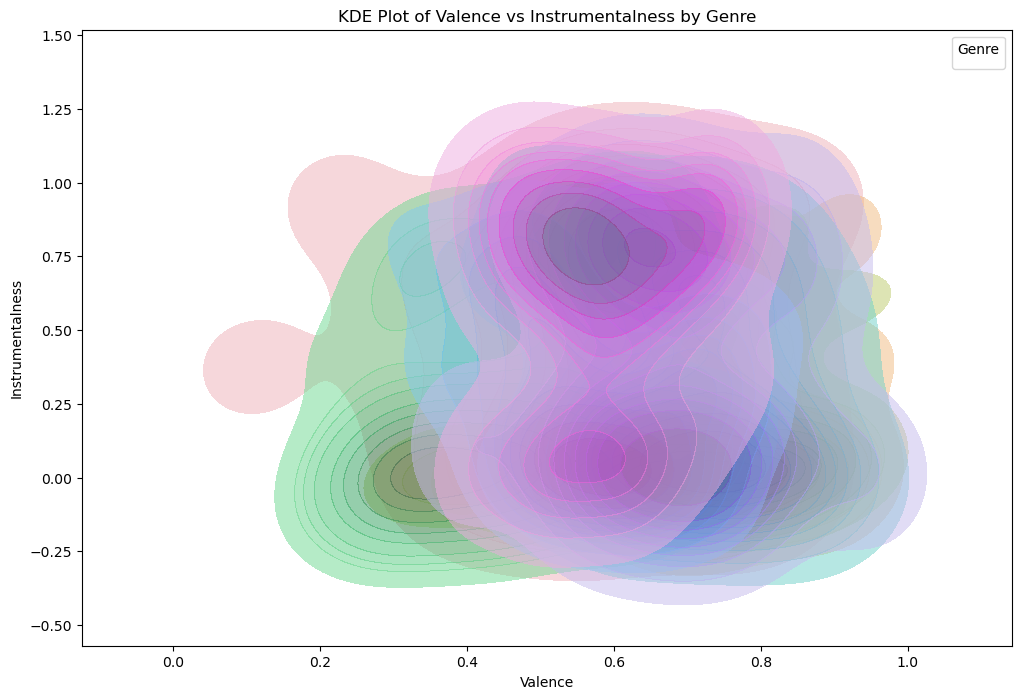

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming combined_df is your DataFrame
df = combined_df

# Plot the KDE for each genre
plt.figure(figsize=(12, 8))
genres = df['class'].unique()
colors = sns.color_palette('husl', len(genres))

for genre, color in zip(genres, colors):
    subset = df[df['class'] == genre]
    sns.kdeplot(
        x=subset['danceability'], 
        y=subset['instrumentalness'], 
        fill=True, 
        alpha=0.5, 
        label=genre, 
        color=color
    )

# Add labels and title
plt.xlabel('Valence')
plt.ylabel('Instrumentalness')
plt.title('KDE Plot of Valence vs Instrumentalness by Genre')
plt.legend(title='Genre')
plt.show()


In [110]:
import plotly.express as px
import pandas as pd

# Assuming combined_df is already defined as the provided DataFrame
# Define the custom color sequence
custom_colors = ['lightgreen', 'darkgreen', 'limegreen', 'lightblue', 'darkblue', 'blue']

# Create a mapping of classes to the custom colors
color_discrete_map = {
    'Acid House_music.csv': custom_colors[0],
    'Acid Techno Mix_music.csv': custom_colors[1],
    'Acid Trance Mix_music.csv': custom_colors[2],
    'House Classics Mix_music.csv': custom_colors[3],
    'Techno Mix_music.csv': custom_colors[4],
    'Trance Classics_music.csv': custom_colors[5]
}

# Plot using Plotly Express
fig = px.scatter_3d(
    combined_df, 
    x='danceability', 
    y='instrumentalness', 
    z='valence', 
    color='class',
    title='3D Scatter Plot Colored by Subcategory',
    color_discrete_map=color_discrete_map
)

fig.show()


In [91]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.express as px

# Calculate the mean and standard deviation for each class
means = combined_df.groupby('class').mean()

#classes = ['Breakbeat', 'Disco', 'Garage', 'Hardcore', 'House', 'Industrial', 'Techno', 'Trance']

# Create a 3D scatter plot for the mean points
mean_fig = px.scatter_3d(
    means.reset_index(),
    x='danceability',
    y='instrumentalness',
    z='valence',
    color='class',
    title='3D Scatter Plot with Means',
    size_max=10,
)

# Show the plot
mean_fig.show()


In [45]:

all_importances = pd.concat(feature_imps)

# Calculate the average importance for each feature
avg_importance = all_importances.groupby('Feature')['Importance'].mean().reset_index()
avg_importance = avg_importance.sort_values(by='Importance', ascending=False)

# Get the top 3 most important features
top_3_features = avg_importance.head(4)

# Print the results
print("Top 3 features with highest average importance:")
print(top_3_features)

Top 3 features with highest average importance:
            Feature  Importance
4             tempo    0.228939
0      danceability    0.180324
2  instrumentalness    0.171709
6           valence    0.152308


In [ ]:
genre_1 = "house"
genre_2 = "techno"
genre_3 = "trance"
genres = [genre_1, genre_2, genre_3]

# # Combine datasets
combined_df = pd.concat([pd.concat(selec_list[genres_names.index(genre_1)]),
                          pd.concat(selec_list[genres_names.index(genre_2)]),
                          pd.concat(selec_list[genres_names.index(genre_3)])])

In [116]:
genre_1 = "house"
genre_2 = "techno"
genre_3 = "trance"
genre_4 = "hardcore"

genres = [genre_1, genre_2, genre_3, genre_4]

# # Combine datasets
# combined_df = pd.concat([selec_list[genres_names.index("house")][0], selec_list[genres_names.index("techno")][0], selec_list[genres_names.index("trance")][0], selec_list[-1][4], selec_list[-1][6], selec_list[-1][7],
#                          selec_list[genres_names.index("house")][3], selec_list[genres_names.index("techno")][2], selec_list[genres_names.index("hardcore")][2], selec_list[-1][3]
#                         ])

combined_df = pd.concat([selec_list[genres_names.index("house")][0], selec_list[genres_names.index("techno")][0], selec_list[genres_names.index("trance")][0], selec_list[-1][4], selec_list[-1][6], selec_list[-1][7]])

genres = ["Acid House", "Acid Techno", "Acid Trance", "House", "Techno", "Trance"]
print(combined_df)

    instrumentalness  time_signature    tempo  loudness  energy  danceability  \
0           0.823000               4  117.576    -6.362   0.933         0.653   
1           0.811000               4  128.103    -6.209   0.878         0.714   
2           0.034800               4  128.045    -8.103   0.892         0.846   
3           0.649000               4  122.825    -8.333   0.583         0.720   
4           0.020100               4  244.035   -15.683   0.611         0.231   
..               ...             ...      ...       ...     ...           ...   
45          0.065100               4  136.018    -4.755   0.930         0.441   
46          0.000303               4  136.010    -5.663   0.935         0.495   
47          0.000079               4  139.975    -5.712   0.945         0.505   
48          0.648000               4  149.960    -7.908   0.879         0.433   
49          0.001300               4  131.904    -9.854   0.740         0.552   

    valence                

In [119]:
combined_df = pd.concat(selec_list[-1])

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



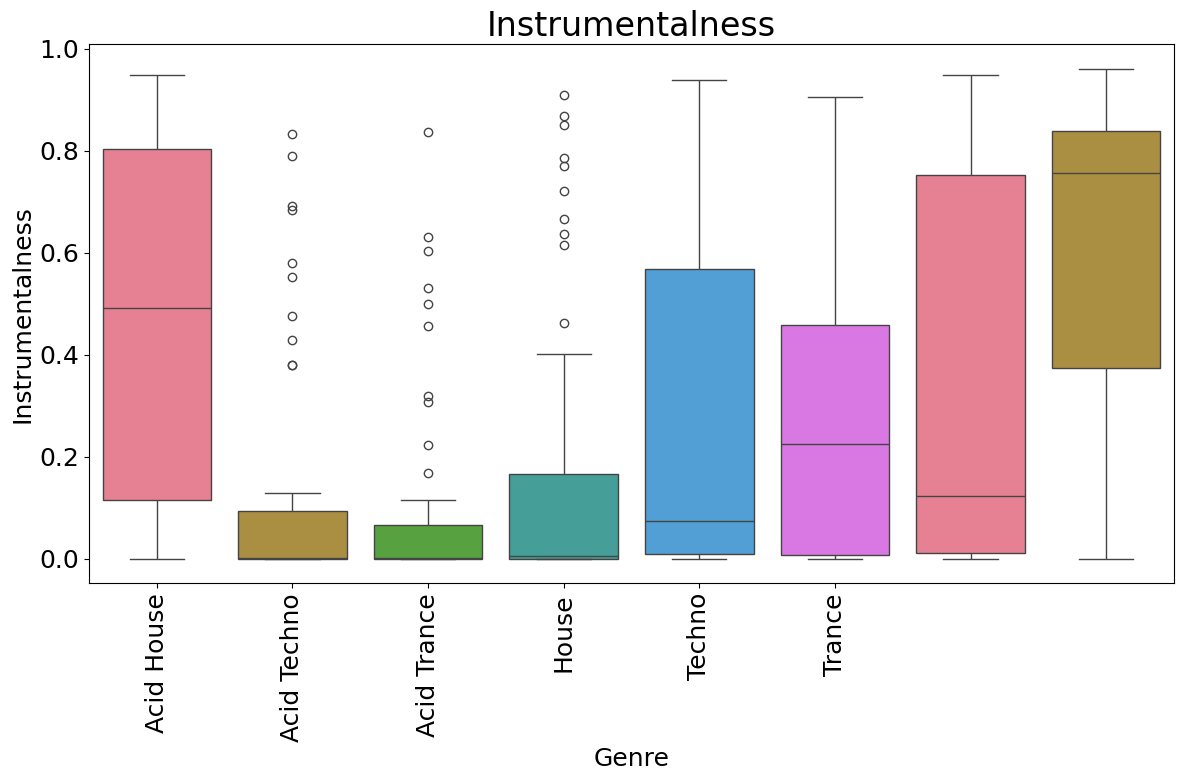

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



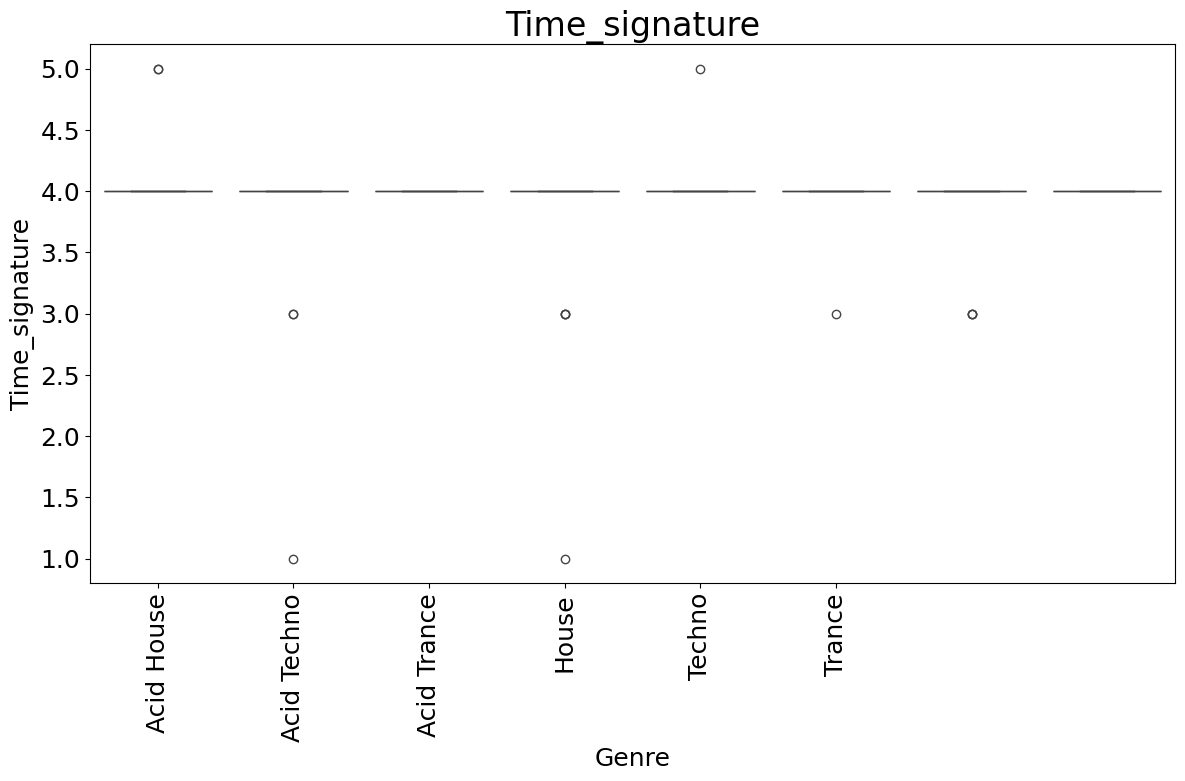

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



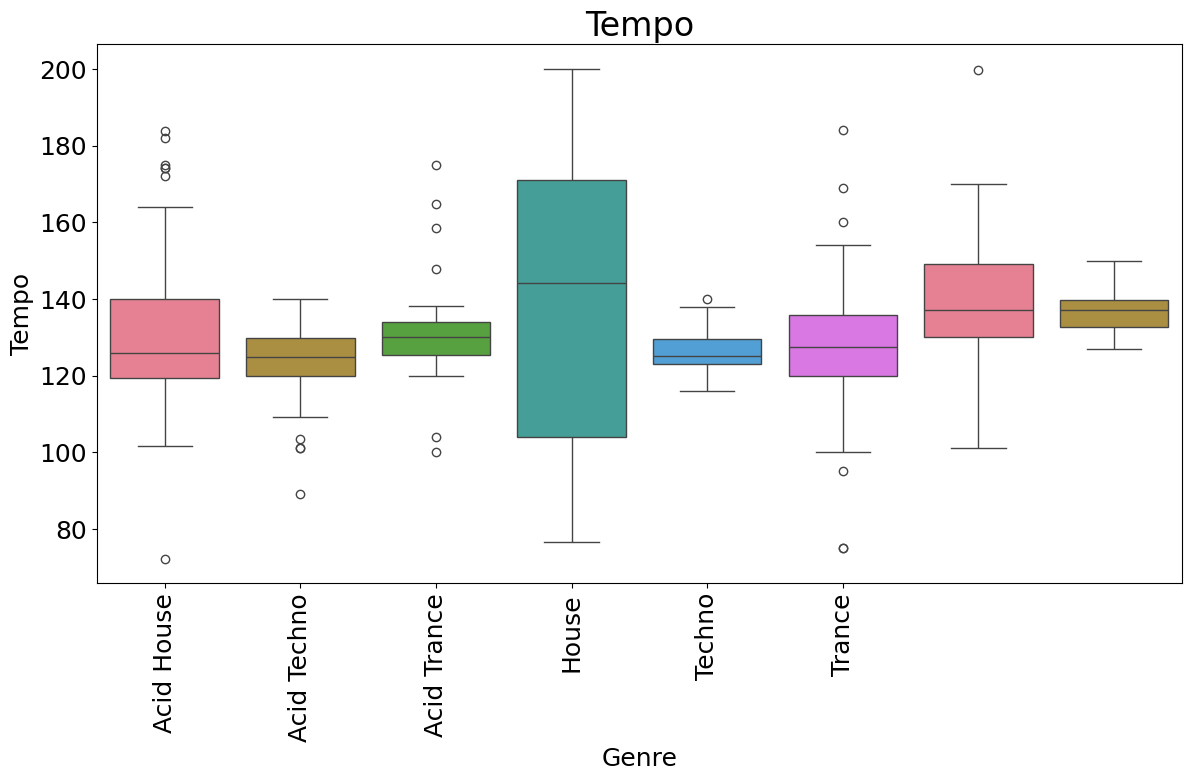

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



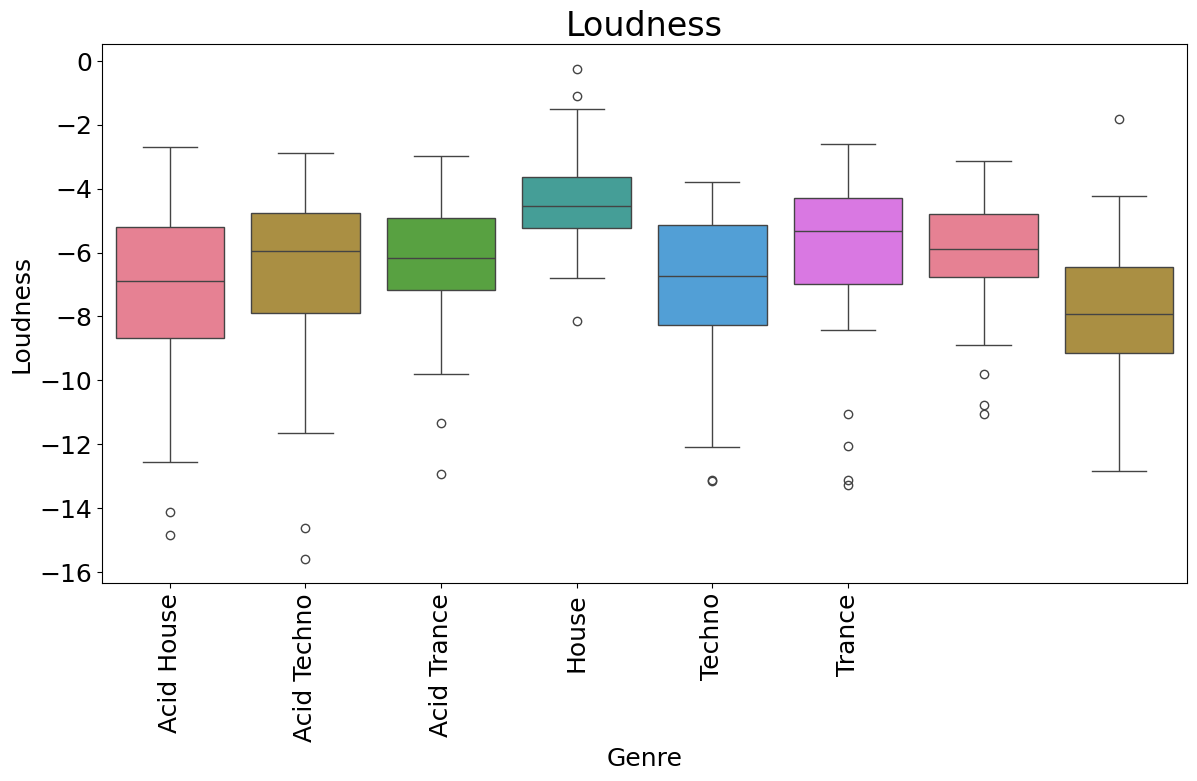

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



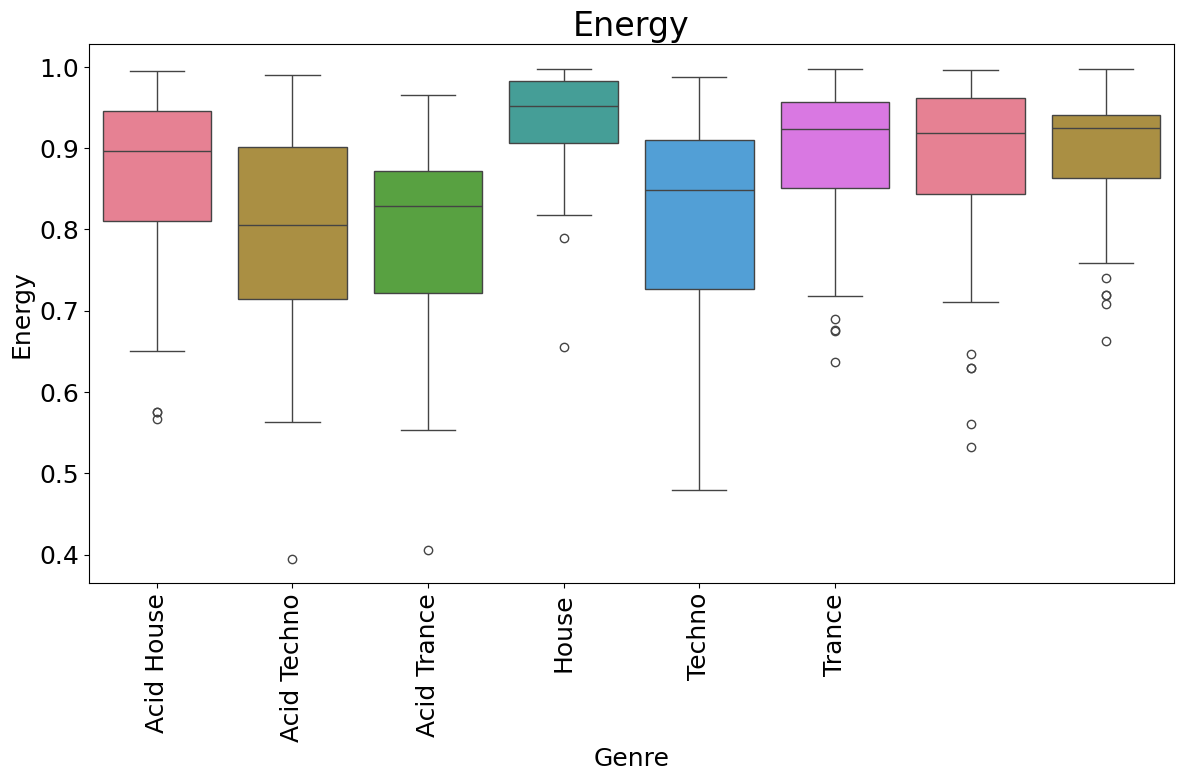

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



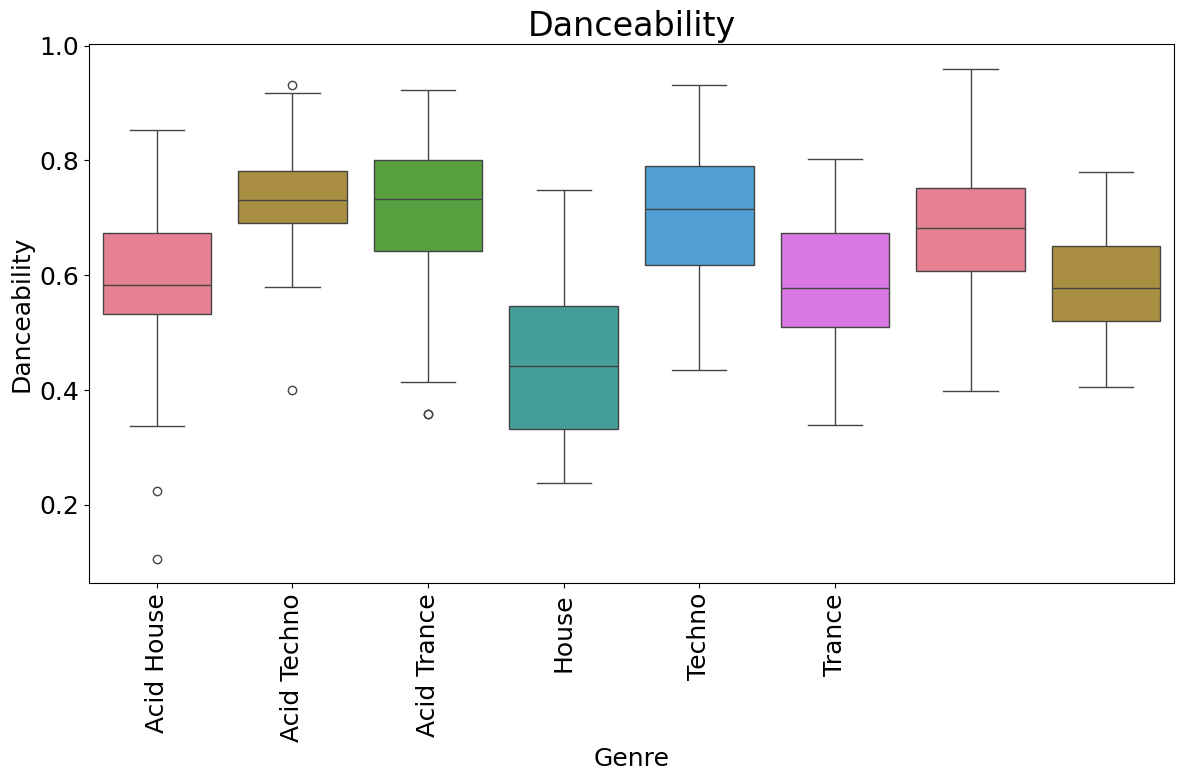

C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\MTDML_WS-3\AppData\Local\Temp\ipykernel_12796\1324462475.py:22: UserWarning:


The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.



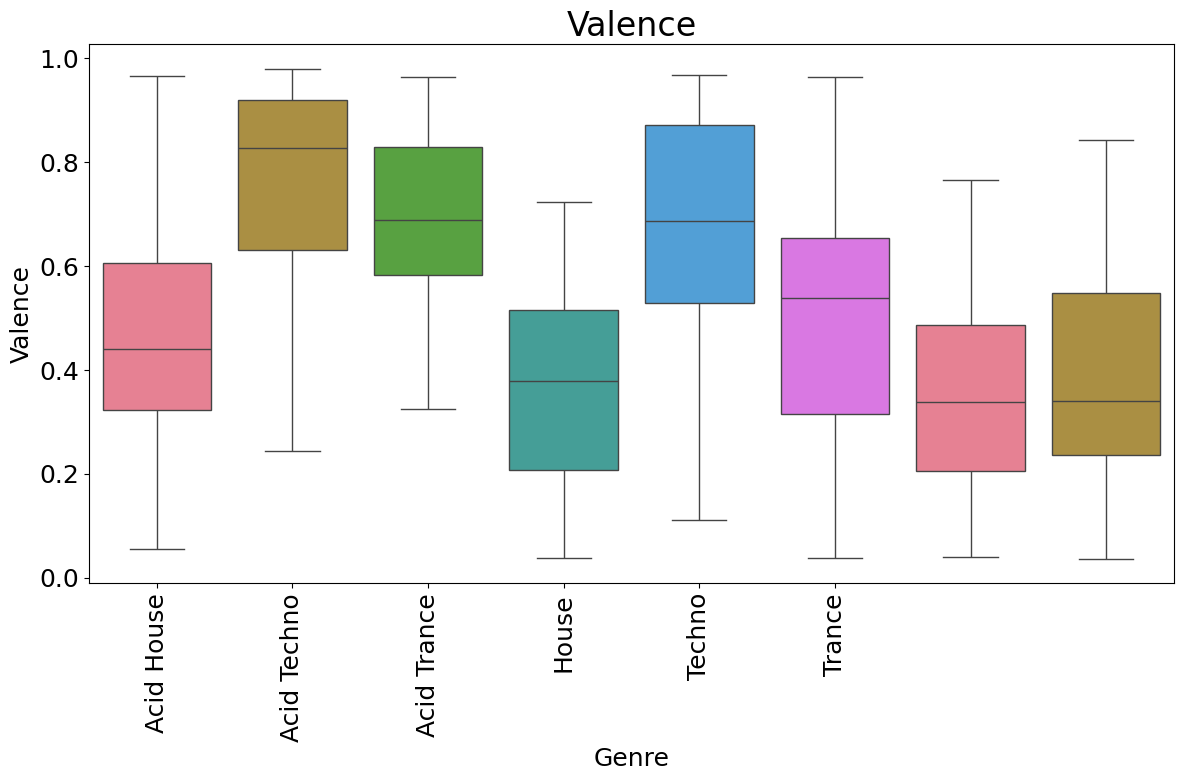

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is already defined as the provided DataFrame

# List of features to plot
features = ['instrumentalness', 'time_signature', 'tempo', 'loudness', 'energy', 'danceability', 'valence']

# List of genre titles


# Define a color palette
palette = sns.color_palette("husl", len(genres))

# Set larger font size globally for all plots
plt.rcParams.update({'font.size': 18})

# Create box plots for each feature
for feature in features:
    plt.figure(figsize=(14, 7))
    sns.boxplot(data=combined_df, x='class', y=feature, palette=palette)
    plt.xticks(ticks=range(len(genres)), labels=genres, rotation=90)
    plt.title(f'{feature.capitalize()}', fontsize=24)  # Increase title font size
    plt.xlabel('Genre', fontsize=18)  # Increase x-axis label font size
    plt.ylabel(feature.capitalize(), fontsize=18)  # Increase y-axis label font size
    plt.show()


In [9]:

print(genre_list)

[    Unnamed: 0                      id  \
0            0  56UNoQz1kXeBZeqmQbFpYe   
1            1  0Xg68XXMRWzKQvD5S6BFvI   
2            2  73CRQe51UEpa3B6ZG7QEsl   
3            3  2Np6ZbVFXfhlk3Oin6i92t   
4            4  023lag1AgeOf7YChojecRu   
5            5  4TJUS843fKiqqIzycM74Oy   
6            6  52erNkfUKv34u02CjcHOPj   
7            7  3ZdAwMX7Lku81KGiqsjDeA   
8            8  2zNuaa0jBttcqSeURO6Odt   
9            9  1mICUTQCbRkAvGmO0cwoAz   
10          10  5q1hpdlf8ncJUhKLyjHoHB   
11          11  0gY2iq0xJPRoIB1PScKSw4   
12          12  7k0ahlHosIWblaaIsEqJ8M   
13          13  3CNwSTOreOvIasuBpgbQ2l   
14          14  2i9Qj1Gyt8HMcLthS2bASx   
15          15  0r8iDf65NHgFgZOGLwj5r8   
16          16  4sIrP85JzNsDMAtQmusMWG   
17          17  2WK1v41VpXZ66mUOMpt1nW   
18          18  5EWFuo4ObEnfndc57sTuIo   
19          19  5fF9T9SMqBKUvT06cn7kBR   
20          20  7oysiJ2yYjVYzrGSmIEzME   
21          21  158v6lUZhHjsogdUtaPpxE   
22          22  39HccIrICWp9EBD8M